# Download Data From Kaggle API

In [ ]:
!mkdir -p ~/ .kaggle

In [ ]:
!cp /content/kaggle.json /content/.kaggle/

In [ ]:
import os

# Set the KAGGLE_CONFIG_DIR environment variable
os.environ['KAGGLE_CONFIG_DIR'] = '/content/.kaggle'

In [ ]:
!chmod 600 /content/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:08<00:00, 30.6MB/s]
100% 1.06G/1.06G [00:08<00:00, 142MB/s] 


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
# Internally it is using genrator concept

train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/train",
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/test",
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
for i in train_ds:
  print(i)

Streaming output truncated to the last 5000 lines.

        [[167.87305  , 147.87305  , 114.87305  ],
         [167.1637   , 147.1637   , 114.1637   ],
         [166.22522  , 146.22522  , 113.22522  ],
         ...,
         [ 80.87305  ,  69.87305  ,  47.873047 ],
         [ 80.87305  ,  69.87305  ,  47.873047 ],
         [ 80.87305  ,  69.87305  ,  47.873047 ]],

        ...,

        [[105.83984  , 100.44336  ,  71.44336  ],
         [114.8678   , 110.28381  ,  79.86511  ],
         [126.72925  , 123.969604 ,  93.04895  ],
         ...,
         [ 50.       ,  74.       ,  51.746094 ],
         [ 50.1875   ,  74.1875   ,  51.933594 ],
         [ 51.       ,  75.       ,  52.746094 ]],

        [[146.76172  , 131.76172  , 102.76172  ],
         [150.63855  , 136.45105  , 107.45105  ],
         [152.54163  , 141.97913  , 111.604126 ],
         ...,
         [ 50.       ,  74.       ,  50.       ],
         [ 50.1875   ,  74.1875   ,  50.1875   ],
         [ 51.       ,  75.       ,  5

In [ ]:
# If I want to Fast Process Perform Unit Scaling

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label




train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model =  Sequential()

In [ ]:
# First Convolution Layer
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

# Second Convolution Layer
model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

# Third Convolution Layer
model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

# Fourth Convolution Layer
model.add(Conv2D(256,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

# Convert data into 1-D Array
model.add(Flatten())

# Adding First Hidden Layer with 128 Neurons and relu Activation Function
model.add(Dense(128,activation='relu'))

# Adding Second Hidden Layer with 64 Neurons and relu Activation Function
model.add(Dense(64,activation='relu'))

# Here We Have 1 Output Since it is Binary Classifiction
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(train_ds,epochs=10,validation_data=validation_ds,batch_size=128)

Epoch 1/10
625/625 [==============================] - 72s 87ms/step - loss: 0.6271 - accuracy: 0.6376 - val_loss: 0.5402 - val_accuracy: 0.7250
Epoch 2/10
625/625 [==============================] - 55s 88ms/step - loss: 0.5018 - accuracy: 0.7491 - val_loss: 0.4371 - val_accuracy: 0.7922
Epoch 3/10
625/625 [==============================] - 53s 83ms/step - loss: 0.4115 - accuracy: 0.8104 - val_loss: 0.4124 - val_accuracy: 0.8172
Epoch 4/10
625/625 [==============================] - 55s 88ms/step - loss: 0.3256 - accuracy: 0.8553 - val_loss: 0.3837 - val_accuracy: 0.8370
Epoch 5/10
625/625 [==============================] - 53s 85ms/step - loss: 0.2334 - accuracy: 0.9007 - val_loss: 0.4841 - val_accuracy: 0.8374
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1540 - accuracy: 0.9398 - val_loss: 0.6484 - val_accuracy: 0.8410
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0959 - accuracy: 0.9630 - val_loss: 0.7993 - val_accuracy:

# Here we Observe The Training Accuracy (0.9829) is High and Validation Accuracy (0.8398) is Low then it is Over-Fitting.


## For Overcome This Issue in CNN, These are The Following Steps:

### 1. Hyperparameter Tuning

### 2. Data Augmentation

### 3. Dropout

### 4. Regularization

# Saving the model

In [ ]:
model.save("/content/dog_vs_cat.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dog_img = plt.imread("/content/Dog.png")

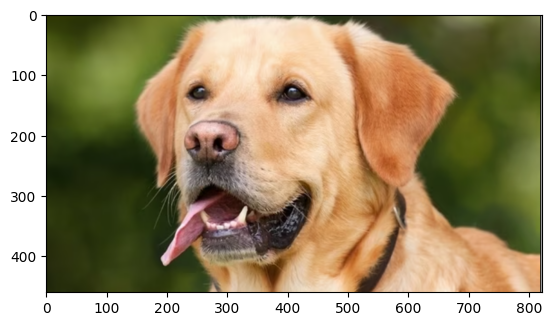

In [ ]:
plt.imshow(dog_img)

In [ ]:
dog_img.shape

(460, 822, 3)

In [ ]:
cat_img = plt.imread("//content/Cat.png")

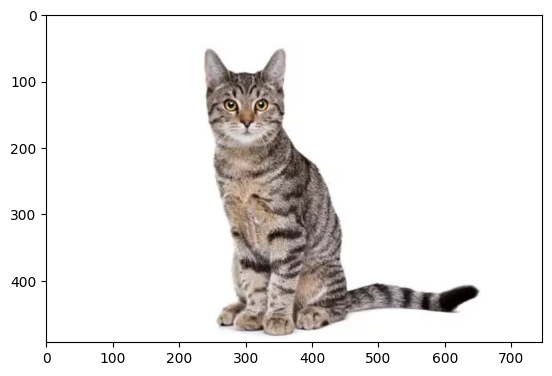

In [ ]:
plt.imshow(cat_img)

In [ ]:
cat_img.shape

(493, 747, 3)

# Resize the both Images

In [ ]:
import cv2

dog_resize = cv2.resize(dog_img,(256,256))
cat_resize = cv2.resize(cat_img,(256,256))

In [ ]:
dog_resize.shape

(256, 256, 3)

In [ ]:
dog_resize = dog_resize.reshape(1,256,256,3)

In [ ]:
dog_resize.shape

(1, 256, 256, 3)

In [ ]:
cat_resize.shape

(256, 256, 3)

In [ ]:
cat_resize = cat_resize.reshape(1,256,256,3)

In [ ]:
cat_resize.shape

(1, 256, 256, 3)

# Prediction:

## Cat=0


## Dog=1

In [ ]:
pred = model.predict(dog_resize)

1/1 [==============================] - 0s 26ms/step


In [ ]:
pred

array([[1.]], dtype=float32)

In [ ]:
model.predict(cat_resize)

1/1 [==============================] - 0s 18ms/step


array([[0.00068097]], dtype=float32)

In [ ]:
if pred==0:
  print("This is a Image of Cat")

else:
  print("This is a Image of Dog")

This is a Image of Dog


 ### For pred2 it is Giving us Wrong Prediction this is Happend Because of Over-Fitting

# Data Augmentation:

###  Data augmentation can address a variety of challenges when training a CNN model, such as Limited or Imbalanced Data, Overfitting, and Variation and Complexity. This technique can increase the size of the Dataset and balance the classes by applying different Transformations.

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
myimg = image.load_img(r"/content/Cat.png",target_size=(250,250))

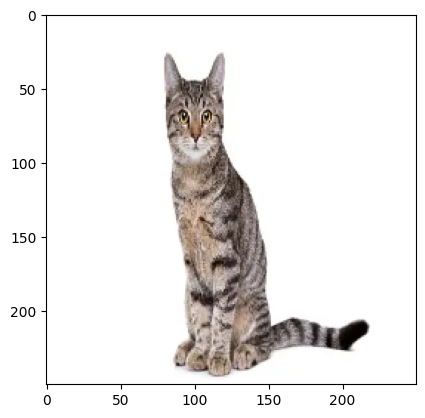

In [ ]:
plt.imshow(myimg)

In [ ]:
type(myimg)

PIL.Image.Image

In [ ]:
img = image.img_to_array(myimg)

In [ ]:
type(img)

numpy.ndarray

In [ ]:
datagen=ImageDataGenerator(
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2

)

In [ ]:
img.shape

(250, 250, 3)

In [ ]:
input_image = img.reshape(1,250,250,3)

In [ ]:
input_image.shape

(1, 250, 250, 3)

In [ ]:
i=0
for output in datagen.flow(input_image,save_to_dir="/content/augmented_image"):
  i=i+1

  if i==5:
    break

In [ ]:
train_datagen = ImageDataGenerator(
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    rescale=1./255
)

In [ ]:
train_datagen

In [ ]:
train_genrator = train_datagen.flow_from_directory(
    "/content/dogs_vs_cats/train",
    target_size=(150,150),
    batch_size=15,
    class_mode="binary"
)

Found 20000 images belonging to 2 classes.


In [ ]:
for i in train_genrator:
  print(i)

Streaming output truncated to the last 5000 lines.
         [0.07450981, 0.07058824, 0.05490196],
         [0.07282774, 0.06890617, 0.0532199 ],
         [0.07383527, 0.06991369, 0.05422742]],

        [[0.47865826, 0.41591313, 0.31395236],
         [0.48198012, 0.41923502, 0.3172742 ],
         [0.48825094, 0.42550585, 0.32354504],
         ...,
         [0.07450981, 0.07058824, 0.05490196],
         [0.07284564, 0.06892407, 0.05323779],
         [0.07378159, 0.06986002, 0.05417375]],

        [[0.47864035, 0.41589525, 0.31393448],
         [0.4819622 , 0.41921708, 0.3172563 ],
         [0.48821515, 0.42547005, 0.32350928],
         ...,
         [0.07450981, 0.07058824, 0.05490196],
         [0.07286353, 0.06894196, 0.05325568],
         [0.07372791, 0.06980634, 0.05412007]]],


       [[[0.6151272 , 0.5972466 , 0.51028115],
         [0.6345216 , 0.61491376, 0.5340188 ],
         [0.625339  , 0.6088298 , 0.53899807],
         ...,
         [0.06980058, 0.08548685, 0.08156528],
      

KeyboardInterrupt: ignored

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
test_genrator = test_datagen.flow_from_directory(
    "/content/dogs_vs_cats/test",
    target_size=(150,150),
    batch_size=15,
    class_mode="binary"
)

Found 5000 images belonging to 2 classes.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model = Sequential()

In [ ]:
# First Convolution Layer
model.add(Conv2D(24,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))

# Second Convolution Layer
model.add(Conv2D(36,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

# Third Convolution Layer
model.add(Conv2D(48,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


# Convert data into 1-D Array
model.add(Flatten())

# Adding First Hidden Layer with 128 Neurons and relu Activation Function
model.add(Dense(64,activation='relu'))

# Adding Second Hidden Layer with 64 Neurons and relu Activation Function
model.add(Dense(32,activation='relu'))

# Here We Have 1 Output Since it is Binary Classifiction
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 24)      672       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 74, 74, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 36)        7812      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 36, 36, 36)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 48)        15600     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 17, 17, 48)       

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit_generator(train_genrator,epochs=1,validation_data=test_genrator)

<ipython-input-107-a35a7e46d972>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_genrator,epochs=1,validation_data=test_genrator)


1334/1334 [==============================] - 143s 106ms/step - loss: 0.6271 - accuracy: 0.6441 - val_loss: 0.5748 - val_accuracy: 0.7008
